In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%pip install EMD-signal # USE TO INSTALL EMD PACKAGE
#%pip install openpyxl   # may have to use to open the xlsx file
from PyEMD import EMD
import matplotlib.dates as mdates
excel_path = pd.read_excel("yourpath") # Replace with your actual file path

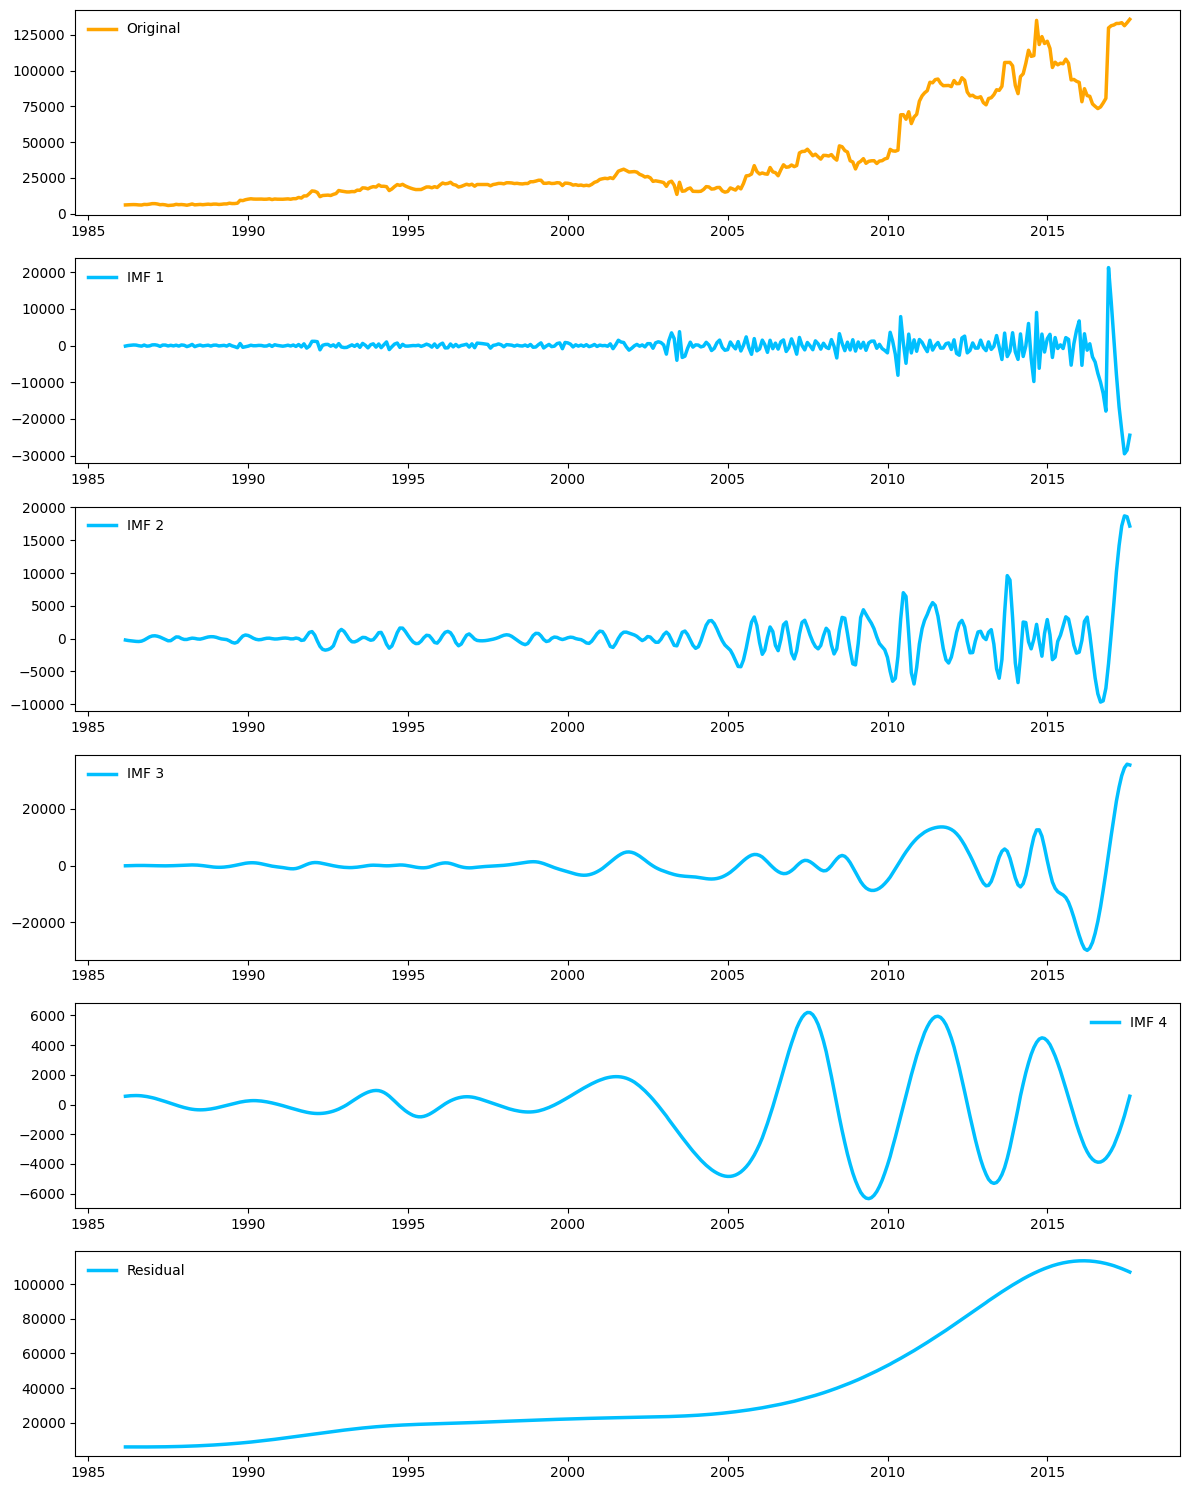

In [ ]:
def load_mvel1_from_excel(path):
    df = pd.read_excel(path)

    # Parse the 'DATE' column
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.set_index('DATE')

    # Drop missing values
    mvel1 = df['mvel1'].dropna()

    return mvel1

# Perform EMD and return IMFs (1-4) and residual
def get_imfs_and_residual(series):
    emd = EMD()
    IMFs = emd(series.values)
    residual = IMFs[-1]  # Residual (after IMF4)
    return IMFs[:4], residual  # Return first 4 IMFs and residual

# Plot IMFs 1-4, residual, and original data
def plot_imfs_and_residual(series, imfs, residual):
    fig, axs = plt.subplots(6, 1, figsize=(12, 15), facecolor='none')  # 6 plots: 4 IMFs + residual + original

    # Plot original data
    axs[0].plot(series.index, series, label='Original', color='orange', linewidth=2.5)
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axs[0].xaxis.set_major_locator(mdates.YearLocator(base=5))
    axs[0].set_facecolor('none')  # Transparent axes background
    axs[0].legend(facecolor='none', edgecolor='none', loc='best')

    # Plot each IMF (1-4)
    for i in range(4):
        axs[i + 1].plot(series.index, imfs[i], label=f'IMF {i + 1}', color='deepskyblue', linewidth=2.5)
        axs[i + 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        axs[i + 1].xaxis.set_major_locator(mdates.YearLocator(base=5))
        axs[i + 1].set_facecolor('none')  # Transparent axes background
        axs[i + 1].legend(facecolor='none', edgecolor='none', loc='best')

    # Plot residual
    axs[5].plot(series.index, residual, label='Residual', color='deepskyblue', linewidth=2.5)
    axs[5].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axs[5].xaxis.set_major_locator(mdates.YearLocator(base=5))
    axs[5].set_facecolor('none')  # Transparent axes background
    axs[5].legend(facecolor='none', edgecolor='none', loc='best')

    plt.tight_layout()
    plt.show()

# Main function
if __name__ == "__main__":
    excel_path = "yourpath"  # Replace with your actual file path
    mvel1_series = load_mvel1_from_excel(excel_path)  # Load data from Excel
    imfs, residual = get_imfs_and_residual(mvel1_series)  # Get IMFs and residual
    plot_imfs_and_residual(mvel1_series, imfs, residual)  # Plot all IMFs and residuals